In [311]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
#import sweetviz as sv

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [312]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

test_df2=pd.read_csv("test.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [313]:
#report =sv.analyze(train_df)
#report.show_html("report.html")

In [314]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [315]:
train_df.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)

In [316]:
train_df["Age"].fillna(train_df["Age"].median(),inplace=True)
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0],inplace=True)

In [317]:
print(train_df.isnull().sum())
train_df.head()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [318]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [319]:
train_df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

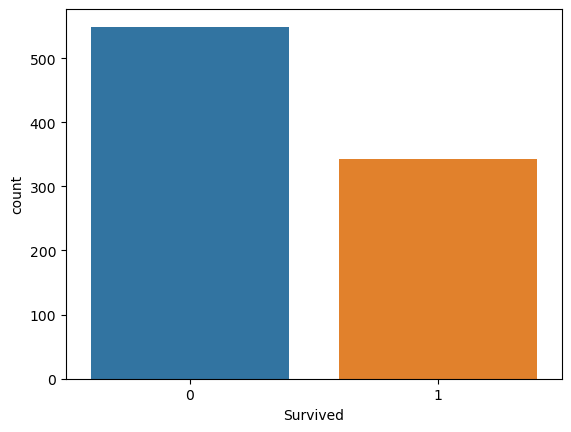

In [320]:
sns.countplot(x="Survived",data=train_df)

In [321]:
train_df.value_counts("Sex")

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

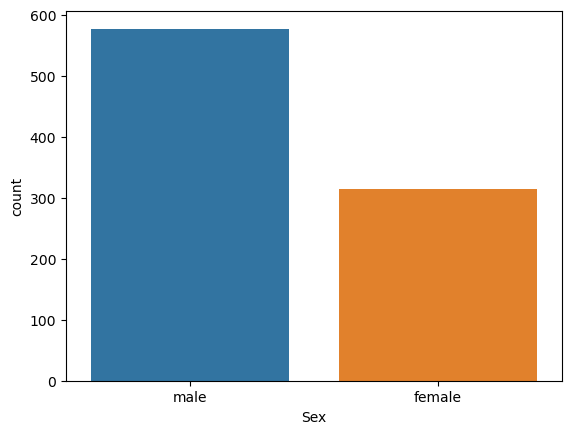

In [322]:
sns.countplot(x="Sex",data=train_df)

<Axes: xlabel='Sex', ylabel='count'>

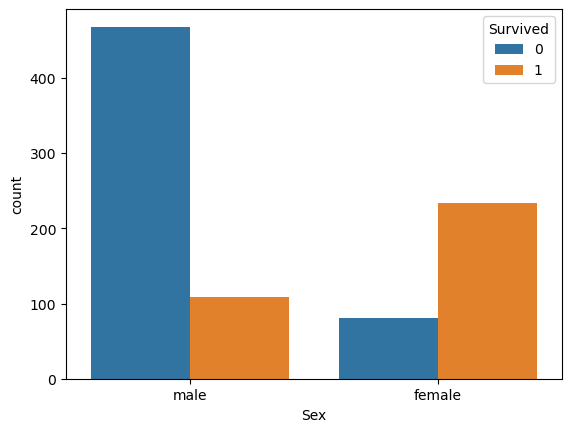

In [323]:
sns.countplot(x="Sex",hue="Survived",data=train_df)

In [324]:
train_df.value_counts("Pclass")

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

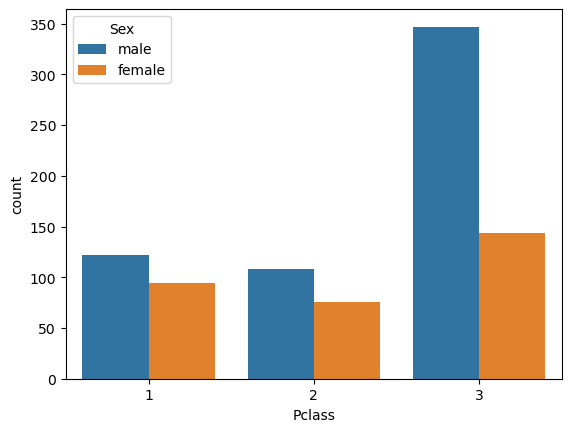

In [325]:
sns.countplot(x="Pclass",hue="Sex",data=train_df)

<Axes: xlabel='Pclass', ylabel='count'>

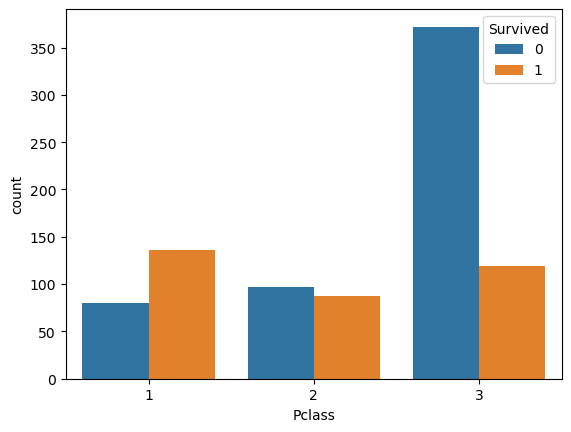

In [326]:
sns.countplot(x="Pclass",hue="Survived",data=train_df)

In [327]:
train_df.replace({"Sex":{"male":0,"female":1},"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)

In [328]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


<Axes: >

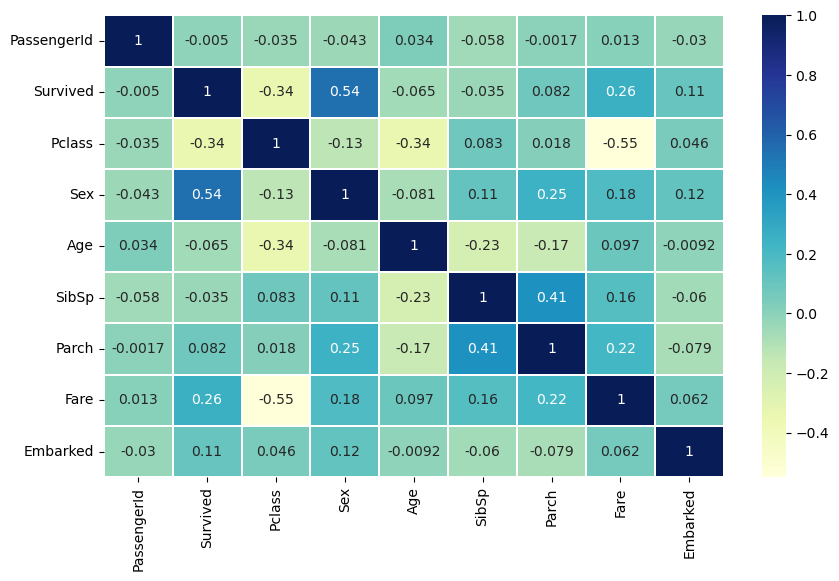

In [329]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(),annot=True,cmap='YlGnBu',linewidths=0.2)

In [330]:
x=train_df.drop(["Survived","PassengerId"],axis=1)
y=train_df["Survived"]

In [331]:
train_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [332]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [333]:
model=LogisticRegression(max_iter=1000,random_state=42)

In [334]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [335]:
X_train_prediction=model.predict(X_train)

In [336]:
accuracy_score(X_train_prediction,Y_train)

0.8019662921348315

In [337]:
accuracy_score(model.predict(X_test),Y_test)

0.7988826815642458

In [338]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [302]:
filter=train_df.columns.to_list()

In [303]:
test_df=test_df.filter(filter)

In [304]:
test_df.replace({"Sex":{"male":0,"female":1},"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)
test_df["Age"].fillna(test_df["Age"].mean(),inplace=True)
test_df["Fare"].fillna(test_df["Fare"].mean(),inplace=True)

In [305]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [306]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


In [307]:
test_df.drop(["PassengerId"],axis=1,inplace=True)

In [308]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [309]:
test_df= scaler.transform(test_df)

In [310]:

test_survival_predictions = model.predict(test_df)

submission = pd.DataFrame({
    "PassengerId": test_df2['PassengerId'],
    "Survived": test_survival_predictions
})

submission.to_csv('submission4.csv', index=False)
